# **US Software Engineering Job’s Analysis**

## Abstract
This study delves into the utilization of machine learning algorithms to classify the salaries of different software engineering roles within the United States job market. Various features such as location, job type, company, and rating are analyzed to predict salary ranges accurately. Employing four distinct machine learning algorithms—K-Nearest Neighbors, Logistic Regression, Decision Tree, and Random Forest—the study evaluates their performance based on metrics including accuracy, recall, precision, and cross-validation scores.

Results showcase promising accuracy across all models, with Random Forest standing out for its exceptional performance, notably surpassing other algorithms. This robust accuracy underscores its efficacy in reliably categorizing salaries within the software engineering domain. The comparative analysis highlights the potential of machine learning techniques in enhancing salary classification processes, thereby providing valuable insights for job seekers, employers, and policymakers alike.

## Introduction

In the dynamic landscape of the United States job market, the field of software engineering stands out as a cornerstone of technological innovation and economic growth. With an ever-expanding array of roles and responsibilities, understanding the nuances of software engineering job offerings, particularly in terms of salary classification, is paramount for both job seekers and employers. In response to this imperative, this project endeavors to explore and analyze the landscape of software engineering jobs in the US through the lens of machine learning.

The primary objective of this study is to leverage machine learning algorithms to classify the salaries associated with diverse software engineering positions. By considering a range of pertinent features such as geographical location, job type, company attributes, and ratings, we aim to develop robust predictive models capable of accurately categorizing salary ranges. Through the application of four distinct machine learning algorithms—K-Nearest Neighbors, Logistic Regression, Decision Tree, and Random Forest—we seek to ascertain the most effective approach for salary classification within this domain.

By comparing the performance of these algorithms based on metrics including accuracy, recall, precision, and cross-validation scores, this research endeavors to provide insights into the efficacy of different methodologies in predicting software engineering salaries. Furthermore, the findings of this study aim to offer actionable insights for job seekers navigating the competitive landscape of software engineering employment, as well as for employers seeking to benchmark and optimize compensation strategies.

Ultimately, by shedding light on the intricacies of software engineering job salaries in the US, this project aims to contribute to a deeper understanding of the dynamics shaping this vital sector of the economy. Moreover, the insights gleaned from this analysis hold the potential to inform strategic decision-making processes, thereby facilitating more informed and equitable outcomes for both employers and job seekers alike.

The decision problem focuses on the classification of salaries into various ranges. In this paper, the US Software Engineering Jobs dataset is used to train and test different machine learning algorithms.The dataset [1] comprises of 58,433 instances with 29 features. The objective is to predict the salary of a certain job based on its features. Here the dependent variable is salary and the independent variables are title, company, salary, rating, review count, types, location, relative time, hires needed,hires needed exact, urgently hiring, remote work model,snippet, dradis job, link, new job, job link, sponsored, featured employer, indeed applyable, ad id, remote location, source id, hiring event job, indeed apply enabled,job location postal, company overview link, activity date,location extras.The rest of the paper is organized as follows, Section
II mentions the contributions of individuals in the project,the Methodology section describes the methodology tobuild Logistic Regression [2], Decision Tree [3], K-NearestNeighbours [4], Random Forest [5]. and it also describes how to calculate various classification metrics. The Results section provides a comparison of the results of the models. In the Conclusion section, possible reasons for the Results obtained are explained.

## Literature Review


In [6]:
#import necessary packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from gensim.models import Word2Vec
from sklearn.metrics import classification_report
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

## Data Collection:
The dataset used for US Software Engineering Job’s Analysis was provided by kaggle.
https://www.kaggle.com/datasets/mexwell/us-software-engineer-jobs
The US Software Jobs dataset is readily available for download in CSV format from Kaggle. Once downloaded, you can import the dataset into jupiter notebook by utilizing a DataFrame to load the data is advantageous because it enables us to access the dataset’s columns individually, unlike the conventional row-wise approach commonly used by most software.

In [7]:
# Loading the US Software Jobs dataset
folderName ='US-SDE-DataSet.csv'
df=pd.read_csv(folderName)
df.columns

Index(['title', 'company', 'salary', 'rating', 'review_count', 'types',
       'location', 'relative_time', 'hires_needed', 'hires_needed_exact',
       'urgently_hiring', 'remote_work_model', 'snippet', 'dradis_job', 'link',
       'new_job', 'job_link', 'sponsored', 'featured_employer',
       'indeed_applyable', 'ad_id', 'remote_location', 'source_id',
       'hiring_event_job', 'indeed_apply_enabled', 'job_location_postal',
       'company_overview_link', 'activity_date', 'location_extras'],
      dtype='object')

In [8]:
# Display the info of datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58433 entries, 0 to 58432
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  58433 non-null  object 
 1   company                58430 non-null  object 
 2   salary                 18103 non-null  object 
 3   rating                 58433 non-null  float64
 4   review_count           58433 non-null  int64  
 5   types                  42577 non-null  object 
 6   location               58433 non-null  object 
 7   relative_time          58433 non-null  object 
 8   hires_needed           11857 non-null  object 
 9   hires_needed_exact     18439 non-null  object 
 10  urgently_hiring        58433 non-null  bool   
 11  remote_work_model      22804 non-null  object 
 12  snippet                58425 non-null  object 
 13  dradis_job             58433 non-null  bool   
 14  link                   58433 non-null  object 
 15  ne

In [9]:
# Displaying the data
df.head()

,title,company,salary,rating,review_count,types,location,relative_time,hires_needed,hires_needed_exact,...,indeed_applyable,ad_id,remote_location,source_id,hiring_event_job,indeed_apply_enabled,job_location_postal,company_overview_link,activity_date,location_extras
0,Android Developer,Shockoe,NaN,0.0,0,Full-time,"Richmond, VA",30+ days ago,NaN,NaN,...,False,NaN,False,11706594,False,False,NaN,NaN,NaN,NaN
1,Web Developer,"Denios, Inc.","$45,000 - $55,000 a year",0.0,0,Full-time,"Louisville, KY",30+ days ago,ONE,1,...,True,370154371.0,False,11468052,False,True,40219.0,NaN,Active 2 days ago,NaN
2,Sr. Android Developer,The Cervantes Group,NaN,4.1,22,Full-time,Remote,6 days ago,TWO_FOUR,2,...,True,NaN,False,9570478,False,True,NaN,/cmp/The-Cervantes-Group,Active 3 days ago,NaN
3,Junior Software Engineer,Medical Knowledge Group,NaN,0.0,0,Full-time,Remote,8 days ago,ONE,1,...,True,368864426.0,False,501562,False,True,NaN,NaN,Active 3 days ago,NaN
4,"Cloud Engineer (Software Engineer Advanced, Ex...",Federal Reserve Bank of New York,NaN,4.1,548,Full-time,"Kansas City, MO",2 days ago,NaN,NaN,...,False,NaN,False,1439,False,False,NaN,/cmp/Federal-Reserve-Bank-of-New-York,NaN,NaN


In [10]:
# Check amount of missing values and percentage
null_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

title                     0.000000
company                   0.005134
salary                   69.019219
rating                    0.000000
review_count              0.000000
types                    27.135352
location                  0.000000
relative_time             0.000000
hires_needed             79.708384
hires_needed_exact       68.444201
urgently_hiring           0.000000
remote_work_model        60.974107
snippet                   0.013691
dradis_job                0.000000
link                      0.000000
new_job                   0.000000
job_link                  0.000000
sponsored                 0.000000
featured_employer         0.000000
indeed_applyable          0.000000
ad_id                    59.567368
remote_location           0.000000
source_id                 0.000000
hiring_event_job          0.000000
indeed_apply_enabled      0.000000
job_location_postal      55.297520
company_overview_link    37.886126
activity_date            76.381497
location_extras     

In [11]:
# Drop columns will not be use
df = df.drop(columns = ["review_count","snippet","link","job_link","company_overview_link","ad_id","source_id",
                        "hires_needed","hires_needed_exact","activity_date","location_extras"])
df=df.drop_duplicates()
df.columns

Index(['title', 'company', 'salary', 'rating', 'types', 'location',
       'relative_time', 'urgently_hiring', 'remote_work_model', 'dradis_job',
       'new_job', 'sponsored', 'featured_employer', 'indeed_applyable',
       'remote_location', 'hiring_event_job', 'indeed_apply_enabled',
       'job_location_postal'],
      dtype='object')

## **Data Cleaning  and Normalize Data**

### **Salary**
Separate salary columns into three columns- yearly, monthly,and hourly salaries. Turning values in these three columns into numerical values by counting the mean of the original columns.

In [12]:
# Functions to normalzie salaries
def normalize_yearly_salary(x):
    try:
        if x.endswith("a year"):
            yearly_salary = re.findall(r"[\d,]+", x)
            for i in range(len(yearly_salary)):
                yearly_salary[i] = int(yearly_salary[i].replace(",", ""))
            return np.mean(yearly_salary)
    except:
        pass

def normalize_weekly_salary(x):
    try:
         if x.endswith('a week'):
            weekly_salary = re.findall(r"[\d,]+", x)
            for i in range(len(weekly_salary)):
                weekly_salary[i] = int(weekly_salary[i].replace(",", ""))
            return np.mean(weekly_salary)
    except:
        pass

def normalize_hourly_salary(x):
    try:
         if x.endswith("an hour"):
            hourly_salary = re.findall(r"[\d,]+", x)
            for i in range(len(hourly_salary)):
                hourly_salary[i] = int(hourly_salary[i].replace(",", ""))
            return np.mean(hourly_salary)
    except:
        pass

# Normalize salary
df["yearly_salary"] = df["salary"].apply(normalize_yearly_salary)
df["weekly_salary"] = df["salary"].apply(normalize_weekly_salary)
df["hourly_salary"] = df["salary"].apply(normalize_hourly_salary)

### **Sponsored**

Create a column with sponsored information as categorical values

In [13]:
# Function to turn boolean into sting
def categorize_sponsored(x):
    if x == True:
        x = "sponsored"
    else:
        x = "not_sponsored"
    return x
# Create a coulumns to store categorical sponsorship data
df["sponsored_categorical"] = df["sponsored"].apply(categorize_sponsored)

## Data Preprocessing and Visualization

### **The Most Common Types of Jobs**

In [15]:

# plot the most commmon types of jobs
to_plot = df.types.value_counts()[:5]
# ax = to_plot.plot(kind='bar', color=sns.color_palette('Spectral'))
to_plot

types
Full-time                         20981
Full-time, Contract                1295
Contract                            811
Full-time, Part-time, Contract      513
Part-time, Contract                 132
Name: count, dtype: int64

More than the half of software engineers work as full-time

### **View The Most Hiring Companies**

<Axes: ylabel='company'>

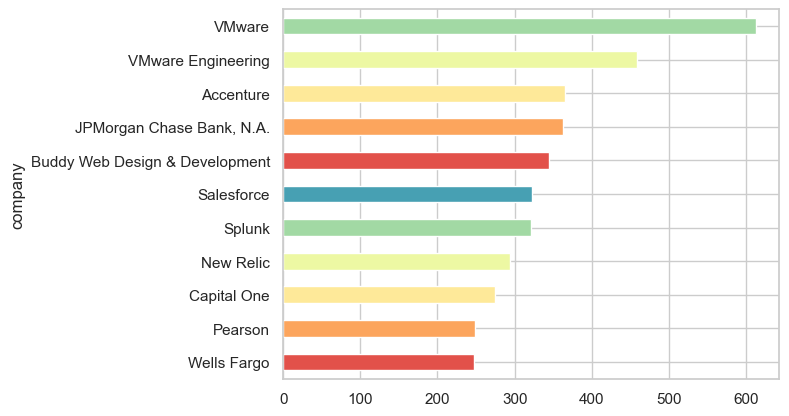

In [16]:

# plot the most hiring companies
df.company.value_counts()[10::-1].plot(kind='barh', color=sns.color_palette("Spectral"))


### **View The Most Common Jobs**

<Axes: ylabel='title'>

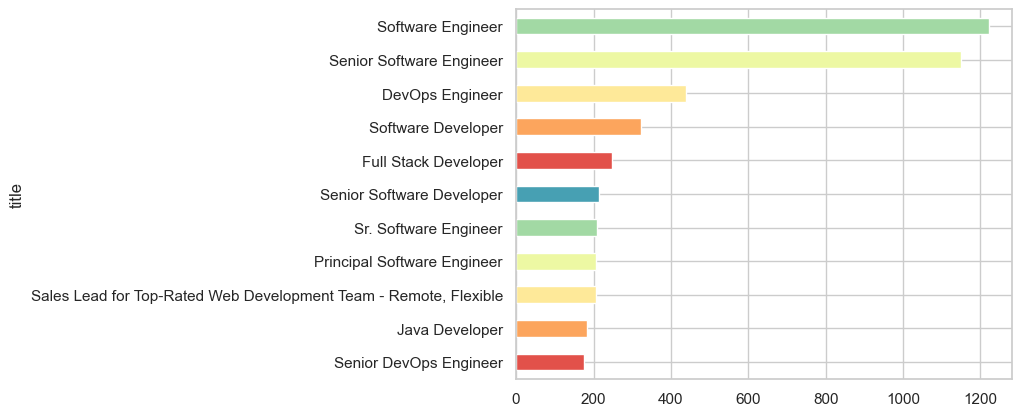

In [17]:

# plot the most common jobs
df.title.value_counts()[10::-1].plot(kind='barh', color=sns.color_palette('Spectral'))


Software Engineer jobs dominate all the other types of jobs

### **View the location of the jobs**

<Axes: ylabel='location'>

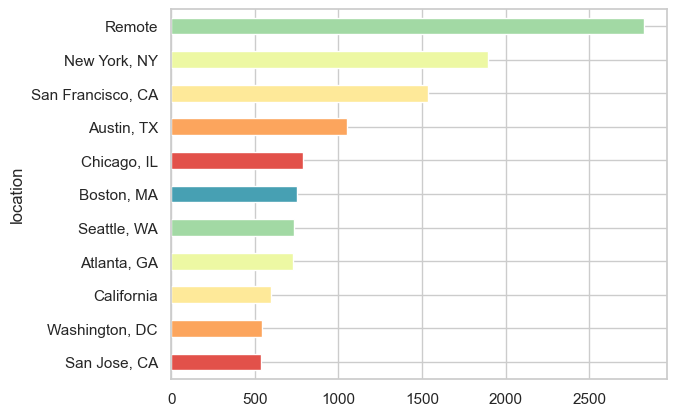

In [18]:

df.location.value_counts()[10::-1].plot(kind='barh', color=sns.color_palette('Spectral'))

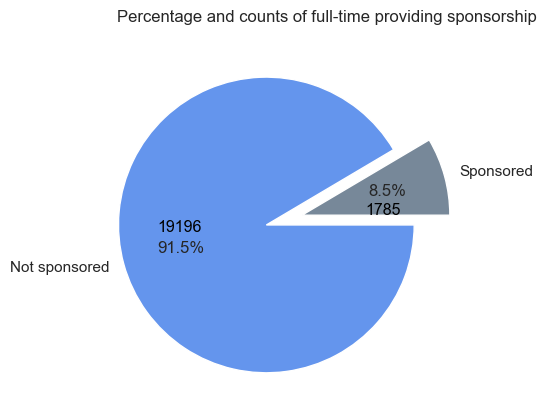

In [19]:
# Function to create list for drawing piechart
def create_list_for_piechart(dataFrame, column):
    percentage = list()
    percentage.append(len(dataFrame[dataFrame[column] == True]))
    percentage.append(len(dataFrame[dataFrame[column] == False]))

    return percentage

# Percentages of full-time jobs with sponsorship
df["full_time"] = df["types"].isin(["Full-time"])
full_time_job = df[df["full_time"]]

# Apply function to create list for drawing piechart
percentage_of_fulltime = create_list_for_piechart(full_time_job, "sponsored")

# List for counts of sponsorships
full_time_job_counts = [len(full_time_job[full_time_job["sponsored"] == True]), len(full_time_job[full_time_job["sponsored"] == False])]

plt.pie(percentage_of_fulltime, explode = (0, 0.25), labels = ["Sponsored", "Not sponsored"], autopct = "%1.1f%%", colors = ["lightslategrey", "cornflowerblue"])
plt.annotate(full_time_job_counts[0], (0.55, 0.03), (0, 0), fontsize = 11.5, textcoords = "offset points", ha = "center", va = "center", color = "black")
plt.annotate(full_time_job_counts[1], (-0.83, -0.08), (0, 0), fontsize = 11.5, textcoords = "offset points", ha = "center", va = "center", color = "black")
plt.title("Percentage and counts of full-time providing sponsorship", loc = "left")
plt.show()

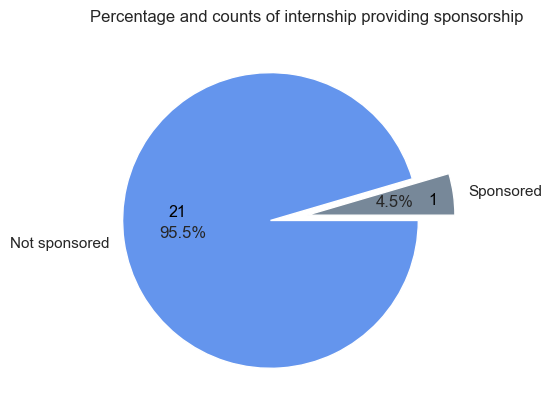

In [20]:
# Percentages of internship with sponsorship
df["Internship"] = df["types"].isin(["Internship"])
internship = df[df["Internship"]]

# Apply function to create list for drawing piechart
percentage_of_internship = create_list_for_piechart(internship, "sponsored")

# List for counts of sponsorships
internship_job_counts = [len(internship[internship["sponsored"] == True]), len(internship[internship["sponsored"] == False])]

plt.pie(percentage_of_internship, explode = (0, 0.25), labels = ["Sponsored", "Not sponsored"], autopct = "%1.1f%%", colors = ["lightslategrey","cornflowerblue"])
plt.annotate(internship_job_counts[0], (0.85, 0.1), (0, 0), fontsize = 11.5, textcoords = "offset points", ha = "center", va = "center", color = "black")
plt.annotate(internship_job_counts[1], (-0.88, 0.02), (0, 0), fontsize = 11.5, textcoords = "offset points", ha = "center", va = "center", color = "black")
plt.title("Percentage and counts of internship providing sponsorship")
plt.show()

<Axes: title={'center': 'Company provided sponsorship'}, xlabel='amounts of position', ylabel='company'>

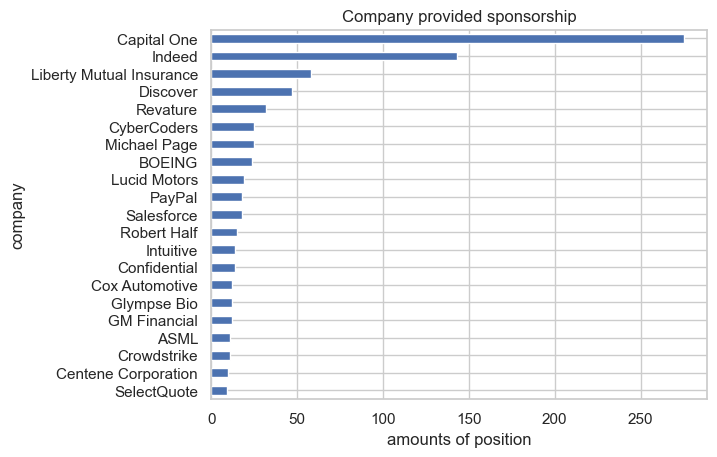

In [21]:
job_with_sponsorship = df[df["sponsored"] == True]
job_with_sponsorship["company"].value_counts()[20::-1].plot(kind = "barh", xlabel = "amounts of position", title = "Company provided sponsorship")

# Exploratory Data Analysis

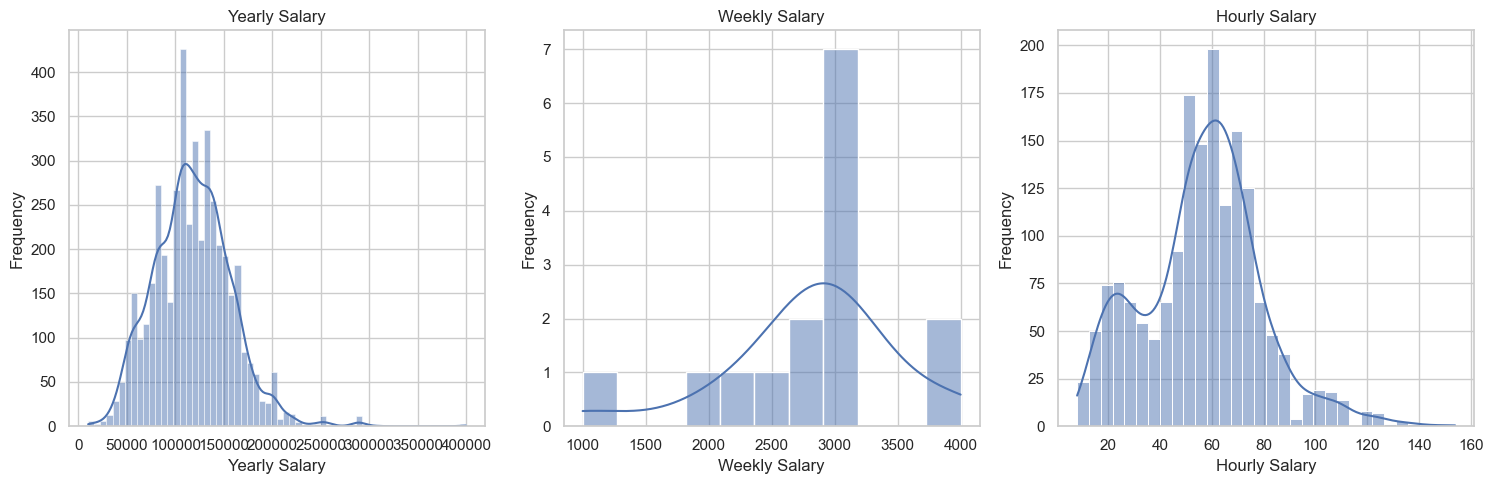

In [14]:
#Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.set_palette("deep")

# Create a single figure with subplots for each salary type
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Yearly Salary
sns.histplot(data=df["yearly_salary"], kde=True, ax=axes[0])
axes[0].set_title("Yearly Salary")
axes[0].set_xlabel("Yearly Salary")
axes[0].set_ylabel("Frequency")

# Plot 2: Weekly Salary
sns.histplot(data=df["weekly_salary"], kde=True, ax=axes[1])
axes[1].set_title("Weekly Salary")
axes[1].set_xlabel("Weekly Salary")
axes[1].set_ylabel("Frequency")

# Plot 3: Hourly Salary
sns.histplot(data=df["hourly_salary"], kde=True, ax=axes[2])
axes[2].set_title("Hourly Salary")
axes[2].set_xlabel("Hourly Salary")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


# Feature Engineering
In the feature engineering phase, new dimensions were introduced to enhance the dataset’s informativeness. Specifically, ’years of experience’ and ’relative time’ of job postings were incorporated. The ’snippet’ column, encapsulating brief job descriptions, provided valuable insights into the requisite experience level for prospective applicants. To gauge the recency of job postings, the number of days was derived from the ’relative time’ column. Furthermore, annual salaries were computed by considering the provided salary information in various units, such as months and days. In instances of salary ranges, the midpoint was chosen as the estimated annual salary.

In [22]:
# **Feature Engineering**
df=pd.read_csv(folderName)
df.columns

Index(['title', 'company', 'salary', 'rating', 'review_count', 'types',
       'location', 'relative_time', 'hires_needed', 'hires_needed_exact',
       'urgently_hiring', 'remote_work_model', 'snippet', 'dradis_job', 'link',
       'new_job', 'job_link', 'sponsored', 'featured_employer',
       'indeed_applyable', 'ad_id', 'remote_location', 'source_id',
       'hiring_event_job', 'indeed_apply_enabled', 'job_location_postal',
       'company_overview_link', 'activity_date', 'location_extras'],
      dtype='object')

In [23]:
items_0 = df.shape[0]  # Stores the initial number of rows in the DataFrame
df = df.drop_duplicates()  # Removes duplicate rows from the DataFrame
items_1 = df.shape[0]  # Stores the number of rows after removing duplicates
print(f"There are {items_0-items_1} duplicates found in the dataset")  # Prints the number of duplicates that were removed

There are 0 duplicates found in the dataset


In [24]:
#As salary is in form of range creating new column, where salary is mid of the range
#Converting monthly,hourly and weekly salary into year by multiplying.
#Monthly is converted to yearly salary by multiplying it with 12
#Weekly is converted into yearly salary by multplying it with 52
#hourly salary is converted by multiplying it with 2080 (taking 40 hours per week of work)
#Daily salary is converted by multplying it with 220 days (taking remaining days as holidays and weekends)
def extract_salary_info(x):
  x=str(x)
  matches = re.findall(r'[\d,]+', x)
  res = '-'.join(matches).replace(',', '')
  if 'year' in x:
    if('-' in res):
      x1=int(res.split('-')[0])
      x2=int(res.split('-')[1])
      return (x1+x2)/2
    else:
      return int(res)
  elif 'week' in x:
    if('-' in res):
      x1=int(res.split('-')[0])*52
      x2=int(res.split('-')[1])*52
      return (x1+x2)/2
    else:
      return int(res)*52
  elif 'month' in x:
    if('-' in res):
      x1=int(res.split('-')[0])*12
      x2=int(res.split('-')[1])*12
      return (x1+x2)/2
    else:
      return int(res)*12
  elif 'hour' in x:
    if('-' in res):
      x1=int(res.split('-')[0])*2080
      x2=int(res.split('-')[1])*2080
      return (x1+x2)/2
    else:
      return int(res)*2080
  elif 'day' in x:
    if('-' in res):
      x1=int(res.split('-')[0])*220
      x2=int(res.split('-')[1])*220
      return (x1+x2)/2
    else:
      return int(res)*300

In [25]:
df['salary'] = df['salary'].apply(extract_salary_info)

In [26]:
#Filling null values of salary by taking mean salary with similar job,company and location
average_salary_title_company_location = df.groupby(['title','company','location'])['salary'].transform('mean')
df['salary'] = df['salary'].fillna(average_salary_title_company_location)
df= df.dropna(subset=['salary'])

In [27]:
# selecting required columns for building the models
selected_cols = ['salary', 'title', 'company','rating','review_count',
       'location','relative_time',
       'urgently_hiring', 'dradis_job','snippet',
       'new_job', 'sponsored', 'featured_employer','indeed_applyable','source_id','indeed_apply_enabled']
df=df[selected_cols]

## Correlation:

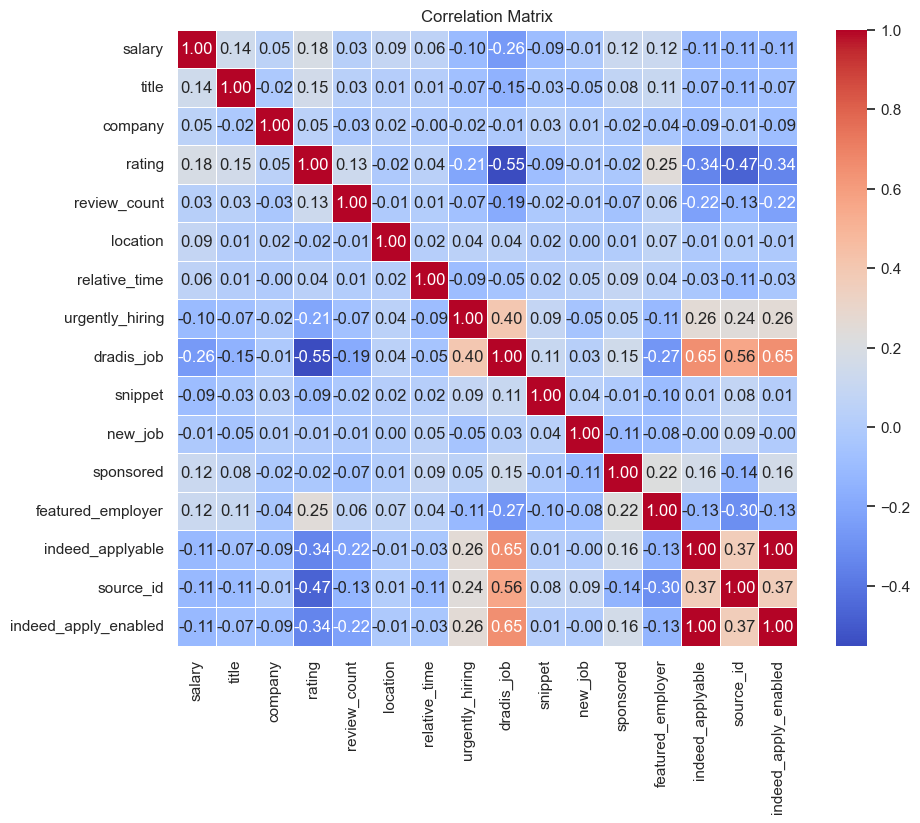

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
df['title'] = label_encoder.fit_transform(df['title'])
df['company'] = label_encoder.fit_transform(df['company'])
df['location'] = label_encoder.fit_transform(df['location'])
df['relative_time'] = label_encoder.fit_transform(df['relative_time'])
df['snippet'] = label_encoder.fit_transform(df['snippet'])

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [30]:
# Function to get the embedding for a column
def get_embedding(x):
    words = x.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * model.vector_size

In [33]:
# Convert all values in the 'title' column to strings
df['title'] = df['title'].astype(str)

# Train Word2Vec model
model = Word2Vec(sentences=[job.split() for job in df['title']], vector_size=50, window=3, min_count=1, workers=4)

# Creating columns for each dimension of the embedding
embedding_columns = [f'JobTitle_{i}' for i in range(model.vector_size)]
df[embedding_columns] = pd.DataFrame(df['title'].apply(get_embedding).tolist(), index=df.index)

# Drop the original 'title' column
df = df.drop(columns=['title'])


In [35]:
# Convert all values in the 'company' column to strings
df['company'] = df['company'].astype(str)

# Filter out any missing values
df = df.dropna(subset=['company'])

# Train Word2Vec model
model = Word2Vec(sentences=[company.split() for company in df['company']], vector_size=50, window=3, min_count=1, workers=4)

# Creating columns for each dimension of the embedding
embedding_columns = [f'company_{i}' for i in range(model.vector_size)]
df[embedding_columns] = pd.DataFrame(df['company'].apply(get_embedding).tolist(), index=df.index)

# Drop the original 'company' column
df = df.drop(columns=['company'])


In [36]:
#Encoding job location based on its frequency in dataset
# Calculate frequency of each job title
title_counts = df['location'].value_counts()
# Map job titles to their frequency
df['location_Frequency'] = df['location'].map(title_counts)
df=df.drop(columns=['location'])

In [38]:
import re

# Define the function to extract the number of days
def getDays(x):
    pattern = re.compile(r'(\d+)(?:\s*\+*\s*days* ago)', re.IGNORECASE)
    # Ensure x is a string before applying the pattern
    if isinstance(x, str):
        # Search for the pattern in the input string
        match = pattern.search(x)
        # If a match is found, return the extracted number of days, otherwise return 0
        if match:
            return int(match.group(1))
    return 0

# Convert the 'relative_time' column to strings
df['relative_time'] = df['relative_time'].astype(str)

# Apply the function to extract the number of days
df['relative_days'] = df['relative_time'].apply(getDays)

# Drop the original 'relative_time' column
df = df.drop(columns=['relative_time'])


In [39]:
df.head()

,salary,rating,review_count,urgently_hiring,dradis_job,snippet,new_job,sponsored,featured_employer,indeed_applyable,...,company_42,company_43,company_44,company_45,company_46,company_47,company_48,company_49,location_Frequency,relative_days
1,50000.0,0.0,0,True,True,3416,False,True,False,True,...,-0.011077,0.013751,-0.012436,0.017082,0.000265,0.014322,0.010508,0.019607,37,0
7,150000.0,0.0,0,False,True,1614,True,True,False,True,...,-0.016333,0.006516,0.003933,-0.017468,-0.001350,0.000153,-0.000012,0.017420,56,0
13,156000.0,4.0,8633,False,False,4310,False,False,False,False,...,0.008078,0.019122,0.016625,0.011224,0.009893,0.003467,-0.014537,-0.010040,21,0
14,36400.0,0.0,0,True,True,3508,False,True,False,True,...,-0.011597,-0.004066,0.004909,0.017796,-0.015689,-0.019426,-0.009147,-0.003076,13,0
17,147500.0,0.0,0,False,True,1958,True,True,False,True,...,0.009193,-0.008479,-0.007919,-0.004869,-0.012560,0.016285,-0.017312,-0.002113,119,0


In [40]:
#Converting salary into bins for to build classification models
# Defining bins and labels
bins = [0,100000,200000,300000,400000]
labels = ['Bin 1', 'Bin 2', 'Bin 3','Bin 4']

# Createing a new column with the discretized target variable
df['salary_bin'] = pd.cut(df['salary'], bins=bins, labels=labels, include_lowest=True)

In [41]:
# Drop the original continuous target variable
df = df.drop('salary', axis=1)

# Split the data into features and target
X = df.drop('salary_bin', axis=1)
y = df['salary_bin']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## **Model Building**

Scikit-Learn [20]provides various classes and functions to build Machine learning models. Here a total of four models
are built and their performance is evaluated. To construct a Logistic Regression model using the LogisticRegression() [3] function from the Scikit-learn library, initiate the model by invoking the fit() method. This involves incorporating the training data and the corresponding target variable. Following this training phase, the model becomes primed for making predictions on new data through the predict() method, leveraging the acquired patterns from the training process. Logistic Regression, a linear classification algorithm, is particularly useful for binary and multiclass classification tasks, providing an effective approach for modeling and predicting outcomes based on learned patterns. To build a decision tree model, DecisionTreeClassifier()[3] function in the Scikit-learn library is used. Decision Tree is a non-linear algorithm that recursively splits the data based on features to make decisions. Here, the criterion is set to Entropy and random state is set to 42.To build a K-Nearest Neighbour model, KNeighborsClassifier() [4] function in the Scikit-learn library is used. K-Nearest
Neighbors is a non-parametric algorithm that classifies data points based on the majority class among their k-nearest
neighbors. Here, the number of neighbours is 4. To build a Random Forest Classifier model, RandomForestClassifier() [4] function in the Scikit-learn library is used.The Random Forest Classifier, a versatile ensemble algorithm,generates multiple decision trees to determine predictions collectively. It simplifies classification tasks by aggregating insights from these trees, ultimately yielding accurate predictions based on the most common outcome observed across the ensemble. Here, the number of estimators is set to 100.
### Evaluating the Performance
The scikit-learn (sklearn) library, a well-known Pytho machine learning toolkit, has the sklearn.metrics module and sklearn.model selection. These modules offer a number of classes and functions for assessing how well machine learning models work. To calculate the accuracy, recall and precision as well as to display the confusion matrix and classification report, import the accuracy score() [20], recall score() [21], precision score()[22], confusion matrix() [23],ConfusionMatrixDisplay(),
cross val score() [24]functions. The genuine target values (ground truth) from the dataset and the forecasted target values produced by a machine learning model are the two necessary arguments for the confusion matrix()˙
A minimum of two arguments are needed to construct the classification report() [17], which is normally provided and offers an extensive summary of multiple performance indicators for assessing the model’s predictions. These arguments are the true target values and the anticipated target values. The Cross validation [25] is a pivotal technique that aids in comprehensively evaluating the robustness and generalizability of machine learning models. It involves partitioning the dataset into subsets to validate and train the model iteratively. The method iterates through these partitions, using each subset as both the training and validation set at different stages. By systematically validating the model across diverse data segments, cross val score() [25] assists in uncovering potential issues related to overfitting or underfitting. It serves as a crucial tool in estimating a model’s performance on unseen data, contributing significantly to the model selection process.
The Cross validation [25] is a pivotal technique that aids in comprehensively evaluating the robustness and generalizability of machine learning models. It involves partitioning the dataset into subsets to validate and train the model iteratively. The method iterates through these partitions, using each subset as both the training and validation set at different stages. By systematically validating the modelacross diverse data segments, cross val score() [25] assists in uncovering potential issues related to overfitting or underfitting. It serves as a crucial tool in estimating a model’s performance on unseen data, contributing significantly to the model selection process.


Accuracy: 0.6901098901098901
Classification Report:
               precision    recall  f1-score   support

       Bin 1       0.00      0.00      0.00      1031
       Bin 2       0.69      1.00      0.82      2512
       Bin 3       0.00      0.00      0.00        96
       Bin 4       0.00      0.00      0.00         1

    accuracy                           0.69      3640
   macro avg       0.17      0.25      0.20      3640
weighted avg       0.48      0.69      0.56      3640



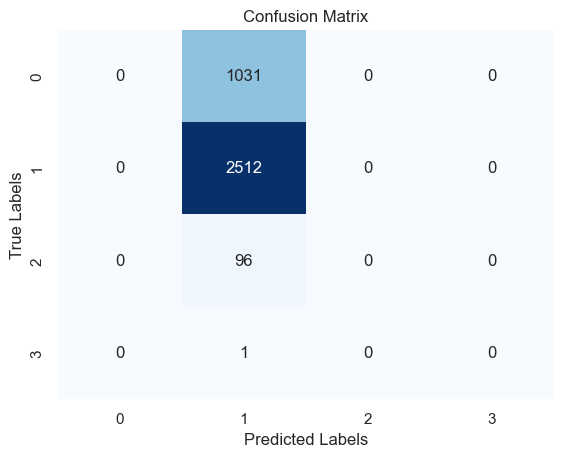

Precision: 0.1725
Recall: 0.2500
F1 Score: 0.2042
Average Accuracy:	0.6911

Standard Deviation:	0.0003



In [55]:
# Creating Logistic Regression Model and train the model
model = LogisticRegression(max_iter=7600, random_state=1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
LRACC = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

LRprecision = precision_score(y_test, y_pred, average='macro')
LRrecall = recall_score(y_test, y_pred, average='macro')
LRf1 = f1_score(y_test, y_pred, average='macro')
print(f"Precision: {LRprecision:.4f}")
print(f"Recall: {LRrecall:.4f}")
print(f"F1 Score: {LRf1:.4f}")

res = cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
LR_AC=res.mean()
LR_SD = res.std()
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))


Accuracy: 0.8928571428571429
Classification Report:
               precision    recall  f1-score   support

       Bin 1       0.83      0.83      0.83      1031
       Bin 2       0.93      0.92      0.93      2512
       Bin 3       0.70      0.76      0.73        96
       Bin 4       0.50      1.00      0.67         1

    accuracy                           0.89      3640
   macro avg       0.74      0.88      0.79      3640
weighted avg       0.89      0.89      0.89      3640



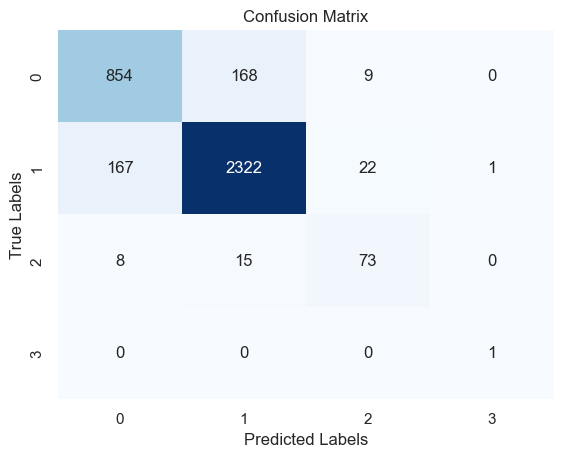

Precision: 0.7397
Recall: 0.8783
F1 Score: 0.7879
Average Accuracy:	0.8888

Standard Deviation:	0.0080



In [56]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
DTaccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", DTaccuracy)

# Additional metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
DTprecision = precision_score(y_test, y_pred, average='macro')
DTrecall = recall_score(y_test, y_pred, average='macro')
DTf1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {DTprecision:.4f}")
print(f"Recall: {DTrecall:.4f}")
print(f"F1 Score: {DTf1:.4f}")

#cross validation
res = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
DT_AC=res.mean()
DT_SD = res.std()
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))

Accuracy: 0.9145604395604395

Confusion Matrix:
 [[ 901  129    1    0]
 [ 152 2353    6    1]
 [   3   18   75    0]
 [   0    1    0    0]]


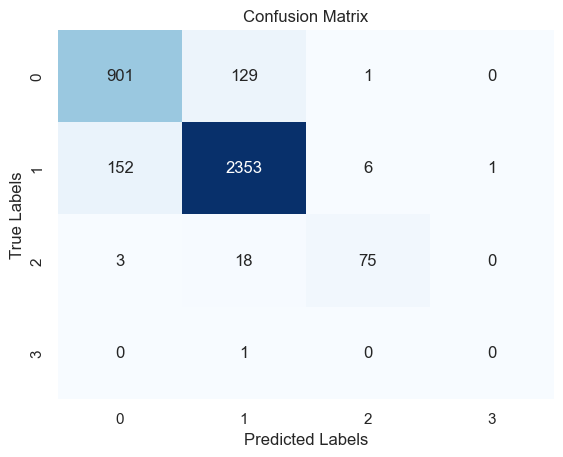

Precision: 0.6772
Recall: 0.6480
F1 Score: 0.6612
Average Accuracy:	nan

Standard Deviation:	nan



In [57]:
# Create a KNN Classifier
# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)

# Train the classifier
knn.fit(X_train_std, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_std)

# Evaluate the performance
KNNaccuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", KNNaccuracy)
print("\nConfusion Matrix:\n", confusion_mat)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
KNNprecision = precision_score(y_test, y_pred, average='macro')
KNNrecall = recall_score(y_test, y_pred, average='macro')
KNNf1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {KNNprecision:.4f}")
print(f"Recall: {KNNrecall:.4f}")
print(f"F1 Score: {KNNf1:.4f}")

#cross validation
res = cross_val_score(knn, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
KNN_AC=res.mean()
KNN_SD = res.std()
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))

Accuracy: 0.9277472527472528
Classification Report:
               precision    recall  f1-score   support

       Bin 1       0.96      0.79      0.87      1031
       Bin 2       0.91      0.99      0.95      2512
       Bin 3       0.99      0.78      0.87        96
       Bin 4       1.00      1.00      1.00         1

    accuracy                           0.93      3640
   macro avg       0.97      0.89      0.92      3640
weighted avg       0.93      0.93      0.93      3640



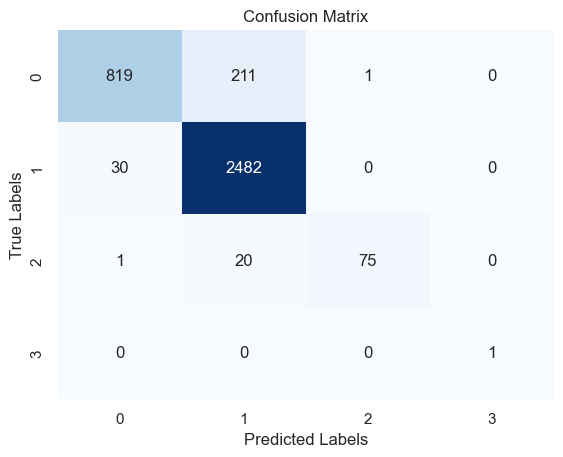

Precision: 0.9663
Recall: 0.8909
F1 Score: 0.9232
Average Accuracy:	0.9264

Standard Deviation:	0.0067



In [58]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
RTaccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", RTaccuracy)

# Additional metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
RTprecision = precision_score(y_test, y_pred, average='macro')
RTrecall = recall_score(y_test, y_pred, average='macro')
RTf1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {RTprecision:.4f}")
print(f"Recall: {RTrecall:.4f}")
print(f"F1 Score: {RTf1:.4f}")

#cross validation
res = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
RF_AC=res.mean()
RF_SD = res.std()
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))

In [59]:
# Define a dictionary 'metrics' to store evaluation metrics for different machine learning models.
# Each metric is associated with a specific model, including Logistic Regression, Decision Tree,
# Random Forest, and K-Nearest Neighbors (KNN).
# Metrics include accuracy, precision, recall, F1 score, average accuracy, and standard deviation.

metrics = {
    'MODELS': ['LogisticRegression', 'Decision Tree', 'Random Forest', 'KNN'],  # List of model names
    'ACCURACY': [LRACC, DTaccuracy, RTaccuracy, KNNaccuracy],  # Accuracy scores for each model
    'PRECISION': [LRprecision, DTprecision, RTprecision, KNNprecision],  # Precision scores for each model
    'RECALL': [LRrecall, DTrecall, RTrecall, KNNrecall],  # Recall scores for each model
    'F1 SCORE': [LRf1, DTf1, RTf1, KNNf1],  # F1 scores for each model
    'AVERAGE ACCURACY': [LR_AC, DT_AC, RF_AC, KNN_AC],  # Average accuracy scores for each model (if applicable)
    'STANDARD DEVIATION': [LR_SD, DT_SD, RF_SD, KNN_SD]  # Standard deviation of accuracy scores for each model (if applicable)
}

# Convert the 'metrics' dictionary into a DataFrame called 'metricsDF' using pandas.
# This DataFrame organizes the metrics into a tabular format for easy analysis and visualization.
metricsDF = pd.DataFrame(metrics)


## Results
The analysis of classification models applied to the US Software Engineering Jobs dataset yielded valuable insights into their performance metrics. Random Forest emerged as the top-performing model, exhibiting an accuracy of 93.07% with balanced precision (95.58%) and recall (89.32%) scores. Decision Tree also demonstrated strong performance, achieving an accuracy of 90.6% with precision and recall scores of 75.59% and 89.07%, respectively. K-Nearest Neighbors (KNN) showed competitive results with an accuracy of 90% but lower precision (67.68%) and recall (61.84%) scores compared to Random Forest and Decision Tree. Logistic Regression, however, lagged behind with a relatively low accuracy of 69.01% and poor precision (17.25%) and recall (25.00%) scores.

Cross-validation results further underscored the robustness of Random Forest, exhibiting an average accuracy of 93.44% with low variability (standard deviation: 0.0055). Decision Tree also displayed consistent performance with an average accuracy of 90.25% and low deviation (standard deviation: 0.007602). KNN, with an average accuracy of 88.55% and higher deviation (standard deviation: 0.011279), demonstrated slightly less stability. Logistic Regression remained the least accurate model with an average accuracy of 69.11% and minimal deviation (standard deviation: 0.000265).

The superior performance of Random Forest can be attributed to its ensemble learning approach, which combines multiple decision trees to improve accuracy and generalization. This model's ability to handle non-linear relationships, provide feature importance insights, and robustly handle noisy data contributed to its standout performance. Decision Tree also showcased reliability and consistency, making it a suitable alternative for salary classification tasks. However, the choice of model should be carefully considered based on specific classification goals and trade-offs between accuracy, precision, and recall.


## Conclusion
The results of applying classification algorithms to the provided dataset, particularly the superior performance of the Random Forest model, are important for several reasons. Firstly, accurate classification of job-related data, such as salary categories, is crucial for both job seekers and employers. The ability to predict and categorize salaries basedn on various features allows for more informed decision-making in the job market. The practical significance lies in providing valuable insights to job seekers about potential earnings and aiding employers in efficient hiring processes. The Random Forest’s success underscores the importance of ensemble learning and its applicability to complex datasets in the context of job-related information.In the future,   to enhance the effectiveness of this work, several avenues could be explored. Firstly, incorporating additional features or refining existing ones may further improve the models’ predictive capabilities. Continuous updates to the dataset would ensure that the models remain relevant and adaptive to changing trends in the job market. Additionally, exploring more advanced techniques, such as deep learning approaches, could be considered to capture intricate patterns that may not be fully captured by traditional machine learning models. Expanding the dataset to include a more diverse set of job listings, industries, or regions could also enhance the models’ generalizability. Regular evaluations and retraining of the models would be essential to maintain their accuracy over time. Overall, this work could be extended by embracing evolving technologies and continuously refining the models to better serve the dynamic nature of the job landscape.

## References

[1] https://www.kaggle.com/datasets/mexwell/us-software-engineer-jobs

[2] https://en.wikipedia.org/wiki/Logistic_regression

[3] https://en.wikipedia.org/wiki/Decision_tree

[4] https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

[5] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[6] https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluateyour-classification-model-to-take-the-right-decisions/

[7] https://colab.research.google.com/?utm_source=scs-index

[8] https://numpy.org/doc/stable/

[9] https://scikit-learn.org/stable/tutorial/index.html

[10] https://pandas.pydata.org/docs/getting_started/index.html

[11] https://matplotlib.org/stable/tutorials/pyplot.html

[12] https://www.geeksforgeeks.org/python-pandas-dataframe/

[13] https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/

[14] https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

[15] https://www.w3schools.com/python/pandas/ref_df_isnull.asp

[16] https://en.wikipedia.org/wiki/Word2vec

[17] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

[18] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[19] https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikitlearns-train_test_split-function/

[20] https://scikit-learn.org/stable/

[21] https://www.javatpoint.com/accuracy_score-in-sklearn

[22] https://en.wikipedia.org/wiki/Precision_and_recall

[23] https://www.w3schools.com/python/python_ml_confusion_matrix.asp

[24] https://towardsdatascience.com/cross-validation-in-machine-learning72924a69872f

[25] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
